In [1]:
import pandas as pd
import numpy as np
from Basic_Analysis import * 
from datetime import datetime
from sklearn.model_selection import train_test_split
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os
import glob
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sandeep's\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# To collect data from my local machine

In [31]:
path = r'''C:\Users\Sandeep's\Desktop\Walmart Challenge\Iphone\Iphone_WOfavorites'''
extension = 'csv'
os.chdir(path)
files = glob.glob('*.{}'.format(extension))

In [18]:
def sentiment_analyser(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)
    neg = sentiment['neg']
    pos = sentiment['pos']
    neu = sentiment['neu']
    comp = sentiment['compound']
    arg_prob = np.argmax([neg,neu,pos])
    
    if arg_prob == 0 :
        pred = -1
    elif arg_prob == 1 :
        pred = 0
    else:
        pred = 1
    return pred

In [38]:
%%time
final_data = pd.DataFrame(columns=['Info','Overall Sentiment','Overall Subjectivity','net favorites per tweet','sales_data'])
count=0
for file in files:
    data = pd.read_csv(file)
    data_pre = preprocess_text(data)
    
    # Sentiment Analysis
    data_pre['sentiment'] = data_pre['preprocess_text'].apply(lambda x: sentiment_analyser(x))
    net_favorites_per_tweet = (data_pre['sentiment']*data_pre['favorites']).sum()/data_pre.shape[0]
    sentiment = data_pre[data_pre['sentiment'] == 1].shape[0]/\
                (data_pre[data_pre['sentiment'] == 1].shape[0]+data_pre[data_pre['sentiment'] == -1].shape[0])
    subjectivity = (data_pre[data_pre['sentiment'] == 1].shape[0]+data_pre[data_pre['sentiment'] == -1].shape[0])/\
                    data_pre[data_pre['sentiment'] == 0].shape[0]
    
    final_data.loc[len(final_data)] = [file,sentiment,subjectivity,net_favorites_per_tweet,sales_data[count]]
    print(file,sentiment,subjectivity,net_favorites_per_tweet,sales_data[count])
    count+=1

iphone_report_2010_q1.csv 0.8461538461538461 0.08459869848156182 0.064 8.75
iphone_report_2010_q2.csv 0.8392857142857143 0.059322033898305086 0.068 8.4
iphone_report_2010_q3.csv 0.9436619718309859 0.07642626480086114 0.074 14.1
iphone_report_2010_q4.csv 0.8307692307692308 0.06951871657754011 0.009 16.24
iphone_report_2011_q1.csv 0.75 0.08695652173913043 0.046 18.65
iphone_report_2011_q2.csv 0.7317073170731707 0.08932461873638345 0.208 20.34
iphone_report_2011_q3.csv 0.717948717948718 0.08459869848156182 0.106 17.07
iphone_report_2011_q4.csv 0.7786259541984732 0.15074798619102417 0.078 37.04
iphone_report_2012_q1.csv 0.7024793388429752 0.13765642775881684 0.076 35.06
iphone_report_2012_q2.csv 0.7480314960629921 0.145475372279496 0.352 26.03
iphone_report_2012_q3.csv 0.7444444444444445 0.0989010989010989 0.034 26.91
iphone_report_2012_q4.csv 0.6717557251908397 0.15074798619102417 -0.101 47.49
iphone_report_2013_q1.csv 0.746031746031746 0.14416475972540047 0.601 37.43
iphone_report_2013_q

In [35]:
# Sales data manually entered from this link
# https://dazeinfo.com/2018/08/24/apple-iphone-sales-worldwide-dgraph/
#            [Q1, Q2, Q3, Q4] - Apple financial year starts from October 1st
sales_data = [8.75,8.4,14.1,16.24,18.65,20.34,17.07,37.04,35.06,26.03,26.91,47.49,37.43,31.24,33.8,51.03,43.72,35.2,39.27,
              74.47,61.17,47.53,48.05,74.78,51.19,40.4,45.51,78.29,50.76,41.03,46.68,77.32,52.22,41.3,46.9,68.4,36.4,33.8,47.2,70] 

In [39]:
final_data.head()

,Info,Overall Sentiment,Overall Subjectivity,net favorites per tweet,sales_data
0,iphone_report_2010_q1.csv,0.846154,0.084599,0.064,8.75
1,iphone_report_2010_q2.csv,0.839286,0.059322,0.068,8.40
2,iphone_report_2010_q3.csv,0.943662,0.076426,0.074,14.10
3,iphone_report_2010_q4.csv,0.830769,0.069519,0.009,16.24
4,iphone_report_2011_q1.csv,0.750000,0.086957,0.046,18.65


In [40]:
final_data.to_csv("Final_data_with_sales.csv",index=False,header=True)

# Timeseries Model with exogenous variable

In [30]:
final_data = pd.read_csv('./Iphone/Iphone_WOfavorites/Final_data_with_sales.csv')
final_data.drop(['Info'],axis=1,inplace=True)

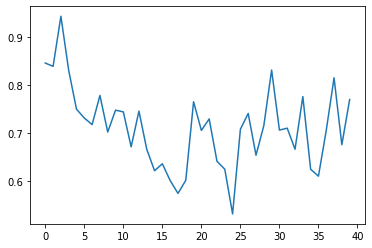

In [31]:
plt.plot(range(final_data.shape[0]), final_data['Overall Sentiment'])
plt.show()

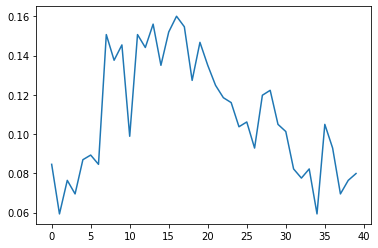

In [32]:
plt.plot(range(final_data.shape[0]), final_data['Overall Subjectivity'])
plt.show()

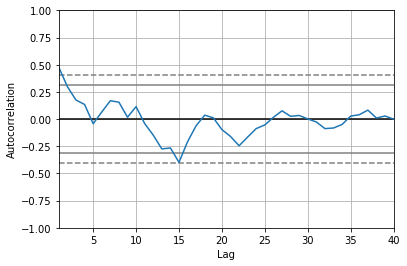

In [33]:
autocorrelation_plot(final_data['Overall Sentiment'])
plt.show()

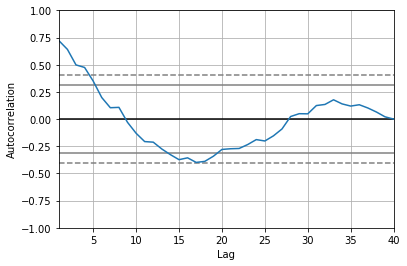

In [34]:
autocorrelation_plot(final_data['Overall Subjectivity'])
plt.show()

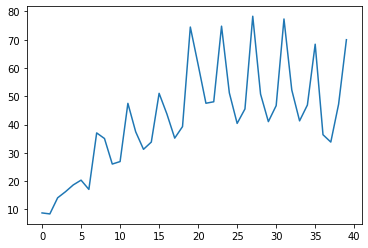

In [35]:
plt.plot(range(40),final_data['sales_data'])

In [36]:
data = pd.read_csv('./Iphone/Iphone_WOfavorites/Final_data_with_sales.csv')
data.drop(['Info'],axis=1,inplace=True)

In [37]:
data.head()

,Overall Sentiment,Overall Subjectivity,net favorites per tweet,sales_data
0,0.846154,0.084599,0.064,8.75
1,0.839286,0.059322,0.068,8.40
2,0.943662,0.076426,0.074,14.10
3,0.830769,0.069519,0.009,16.24
4,0.750000,0.086957,0.046,18.65


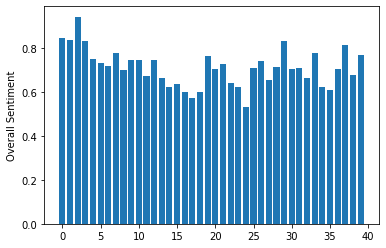

In [39]:
plt.bar(range(len(data)),data['Overall Sentiment'])
plt.ylabel("Overall Sentiment")
plt.savefig("Sentiment.png")
plt.show()

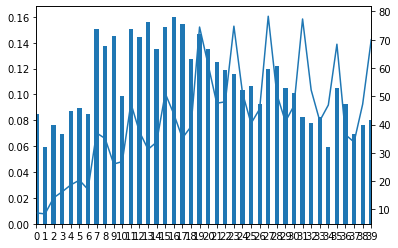

In [40]:
data['Overall Subjectivity'].plot(kind='bar')
data['sales_data'].plot(secondary_y=True)

In [41]:
time_series_data = data.iloc[4:].copy()

In [42]:
prev_q1 = []
prev_q2 = []
prev_q3 = []
prev_q4 = []

for i in range(4,len(data)):
    prev_q4 += [data['sales_data'][i-4]]
    prev_q3 += [data['sales_data'][i-3]]
    prev_q2 += [data['sales_data'][i-2]]
    prev_q1 += [data['sales_data'][i-1]]

In [43]:
time_series_data['previous1_quarter_sales'] = prev_q1
time_series_data['previous2_quarter_sales'] = prev_q2
time_series_data['previous3_quarter_sales'] = prev_q3
time_series_data['previous4_quarter_sales'] = prev_q4

In [44]:
time_series_data.head()

,Overall Sentiment,Overall Subjectivity,net favorites per tweet,sales_data,previous1_quarter_sales,previous2_quarter_sales,previous3_quarter_sales,previous4_quarter_sales
4,0.750000,0.086957,0.046,18.65,16.24,14.10,8.40,8.75
5,0.731707,0.089325,0.208,20.34,18.65,16.24,14.10,8.40
6,0.717949,0.084599,0.106,17.07,20.34,18.65,16.24,14.10
7,0.778626,0.150748,0.078,37.04,17.07,20.34,18.65,16.24
8,0.702479,0.137656,0.076,35.06,37.04,17.07,20.34,18.65


In [45]:
from sklearn.linear_model import LinearRegression
X_train = time_series_data.drop(['sales_data'],axis=1)[:int(0.8*len(time_series_data))]
y_train = time_series_data['sales_data'][:int(0.8*len(time_series_data))]

X_valid = time_series_data.drop(['sales_data'],axis=1)[int(0.8*len(time_series_data)):]
y_valid = time_series_data['sales_data'][int(0.8*len(time_series_data)):]

In [46]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [47]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
pred_train = lr.predict(X_train_scaled)
pred_valid = lr.predict(X_valid_scaled)

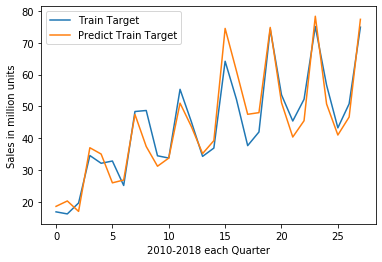

In [49]:
plt.plot(range(len(X_train)),pred_train, label='Train Target')
plt.plot(range(len(y_train)),y_train, label = 'Predict Train Target')
plt.xlabel("2010-2018 each Quarter")
plt.ylabel("Sales in million units")
plt.legend()
plt.savefig('Forecasting results1.png')
plt.show()

In [50]:
for i in range(len(pred_valid)):
    print(pred_valid[i])

50.16137910605975
40.2708946983452
40.8444694870692
73.13272603035705
49.65967681454036
13.061185141763797
47.856674334581875
70.51755887989786


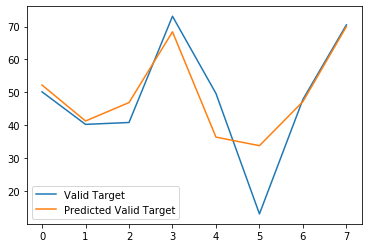

In [51]:
plt.plot(range(len(X_valid)),pred_valid,label='Valid Target')
plt.plot(range(len(y_valid)),y_valid,label = 'Predicted Valid Target')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
mean_squared_error(y_train,pred_train,squared=False)

5.091990988885231

In [55]:
mean_absolute_error(y_train,pred_train)

4.093266264495183

In [74]:
mean_squared_error(y_valid,pred_valid)

83.87271031305424

In [49]:
residuals = (y_train - pred_train).to_list() + (y_valid - pred_valid).to_list()

In [54]:

from sklearn import datasets, linear_model

import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(time_series_data.drop(['sales(millions)'],axis=1))
est = sm.OLS(time_series_data['sales(millions)'], X2)
est2 = est.fit()
print(est2.summary())


c:\users\sandeep's\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        sales(millions)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     27.17
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.18e-10
Time:                        20:45:56   Log-Likelihood:                -117.18
No. Observations:                  36   AIC:                             248.4
Df Residuals:                      29   BIC:                             259.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [55]:
type(est2.summary())

statsmodels.iolib.summary.Summary

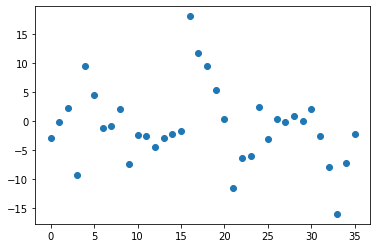

In [51]:
plt.scatter(range(len(residuals)),residuals)

In [ ]:
X_train.columns

In [75]:
print("{}*sentiment+\n{}*subjectivty+\n{}*previous1_quarter_sales+\n{}*previous2_quarter_sales+\n{}*previous3_quarter_sales+\n{}*previous4_quarter_sales".format(lr.coef_[0],
lr.coef_[1],lr.coef_[2],lr.coef_[3],lr.coef_[4],lr.coef_[5]))

5.261480307180663*sentiment+
6.452049873922219*subjectivty+
-0.18009068408623286*previous1_quarter_sales+
0.431889516484794*previous2_quarter_sales+
-3.5552306062053174*previous3_quarter_sales+
2.4483803213232327*previous4_quarter_sales
